# Basic

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [6]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 49s 817us/step - loss: 0.1674 - accuracy: 0.9485
Epoch 2/5
60000/60000 [==============================] - 48s 808us/step - loss: 0.0488 - accuracy: 0.9847
Epoch 3/5
60000/60000 [==============================] - 45s 745us/step - loss: 0.0340 - accuracy: 0.9896
Epoch 4/5
60000/60000 [==============================] - 44s 730us/step - loss: 0.0257 - accuracy: 0.9925
Epoch 5/5
60000/60000 [==============================] - 45s 753us/step - loss: 0.0205 - accuracy: 0.9939


In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 2s 244us/step


In [8]:
test_acc

0.9901999831199646

### Accuracy: 99.01% ###

# Data Augmentation

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [21]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [22]:
#test_datagen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_datagen.flow(
train_images,
train_labels,
batch_size=60)

In [24]:
#validation_generator = test_datagen.flow(test_images, test_labels, batch_size=50)

In [25]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [29]:
history = model.fit_generator(
train_generator,
steps_per_epoch=1000,
epochs=7,
validation_data= (test_images, test_labels),
validation_steps=200)

Epoch 1/7
1000/1000 [==============================] - 95s 95ms/step - loss: 0.2430 - accuracy: 0.9342 - val_loss: 0.7697 - val_accuracy: 0.9640
Epoch 2/7
1000/1000 [==============================] - 91s 91ms/step - loss: 0.2386 - accuracy: 0.9343 - val_loss: 0.8721 - val_accuracy: 0.9485
Epoch 3/7
1000/1000 [==============================] - 53s 53ms/step - loss: 0.2405 - accuracy: 0.9342 - val_loss: 2.8022 - val_accuracy: 0.9399
Epoch 4/7
1000/1000 [==============================] - 52s 52ms/step - loss: 0.2791 - accuracy: 0.9336 - val_loss: 1.3257 - val_accuracy: 0.9540
Epoch 5/7
1000/1000 [==============================] - 52s 52ms/step - loss: 0.2425 - accuracy: 0.9352 - val_loss: 27.9658 - val_accuracy: 0.7587
Epoch 6/7
1000/1000 [==============================] - 53s 53ms/step - loss: 0.2372 - accuracy: 0.9347 - val_loss: 0.7484 - val_accuracy: 0.9653
Epoch 7/7
1000/1000 [==============================] - 53s 53ms/step - loss: 0.2430 - accuracy: 0.9354 - val_loss: 1.9711 - val_a

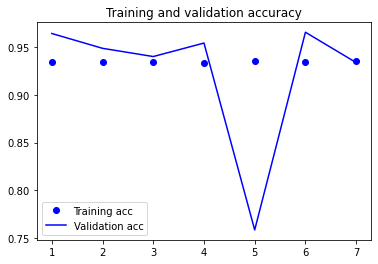

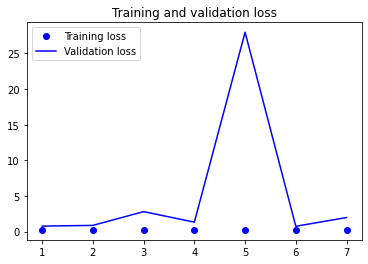

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

###  Accuracy improved from 97.68%.
### Problem: Validation accuracy is slightly higher than training accuracy during most of the epoch. I am getting different accuracy each time I run my model.